# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: February 6, 2026**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** Briefly define the objective of this experiment

The objective of the experiment is to determine whether the aging time (3, 4, or 5 weeks) has an effect on the bitterness of the IPA. The bitterness is measured by International Bitterness Units (IBUs). In other words, the experiment aims to see if different aging durations produce a statistically significant difference in IPA's  bitterness.

**Question 2.** Specify the outcome variable

The outcome variable is the bitterness of the IPA. It is measured by quantitatively in IBUs by using spectrophotometer.

**Question 3.** Specify the independent variable. What are some possible lurking variables?

The independent variable is the aging time with three levels (3, 4, or 5 weeks)
Some of the lurking varaibles are
      - Temperature variations during aging
      - Contamination or microbial activity
      - Oxygen exposure in the tanks

**Question 4.** Briefly explain why a completely randomized design may be appropriate for this experiment.

Completely randomized design might be appropriate for this experiment because all bottles are randomly assigned to aging times, which helps control for other factors and ensures that differences in bitterness (IBUs) are due to aging time rather than other variables. It's simple, fair, and effective for this experiment.

**Question 5.** State the null and alternative hypotheses for this experiment.

Null hypotheses:- Aging time has no effect on the bitterness of the IPA.

Alternative hypotheses:- Aging time does affect the bitterness of the IPA. At least one aging time has a different mean IBU than the others.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?



In [1]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "MihretTe"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
   print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
       print(f"📥 Cloning repo from {repo_url}...")
       os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW1"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/MihretTe/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/MihretTe/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1


In [7]:
# IPA Aging Time Analysis
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
# Load the data (from repo folder)
# Assumes IPA.xlsx is stored in:
# STAT-7220-Applied-Experimental-Design/Assignments/HW1/

data_file = "IPA.xlsx"

if not os.path.exists(data_file):
    raise FileNotFoundError(f"❌ {data_file} not found. Make sure it is in the HW1 folder.")

IPA = pd.read_excel(data_file)

# Preview the data (does NOT affect analysis)
IPA.head()



,Weeks,IBU
0,3 Weeks,39.41
1,3 Weeks,53.18
2,3 Weeks,35.31
3,3 Weeks,59.62
4,3 Weeks,40.95


In [8]:
#Summary statistics by aging time
summary_stats = IPA.groupby("Weeks")["IBU"].agg(
    Mean="mean",
    Median="median",
    Std_Dev="std",
    Min="min",
    Max="max"
)

summary_stats


,Mean,Median,Std_Dev,Min,Max
Weeks,,,,,
3 Weeks,49.216,50.785,8.300656,35.31,59.62
4 Weeks,62.751,65.780,8.250384,47.82,71.70
5 Weeks,69.725,70.950,5.631258,60.09,78.03


<Figure size 640x480 with 0 Axes>

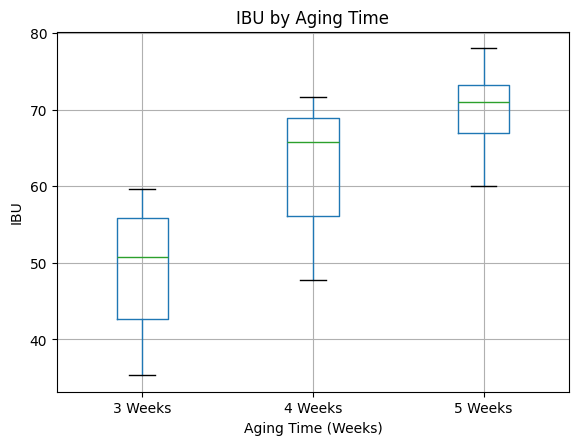

In [9]:
#Boxplot (distribution comparison)
plt.figure()
IPA.boxplot(column="IBU", by="Weeks")
plt.title("IBU by Aging Time")
plt.suptitle("")  # remove extra title
plt.xlabel("Aging Time (Weeks)")
plt.ylabel("IBU")
plt.show()


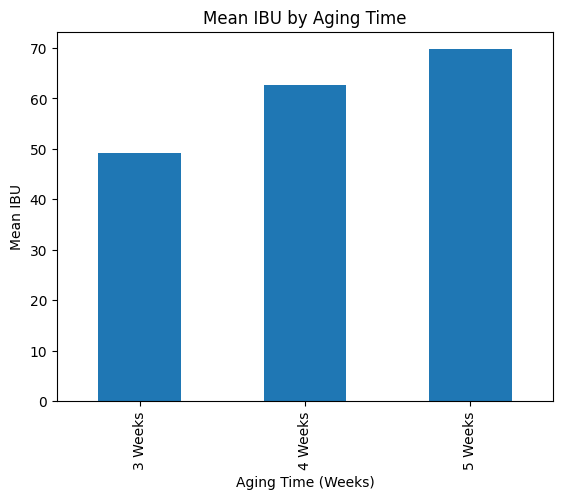

In [10]:
#Mean IBU by Aging Time
means = IPA.groupby("Weeks")["IBU"].mean()

plt.figure()
means.plot(kind="bar")
plt.xlabel("Aging Time (Weeks)")
plt.ylabel("Mean IBU")
plt.title("Mean IBU by Aging Time")
plt.show()



Exploratory analysis shows that mean IBUs increase with aging time, with 3-week beer lowest and 5-week beer highest. Boxplots and mean plots reveal an upward shift in bitterness and limited overlap between groups. These results support the alternative hypothesis, indicating that aging time affects IPA bitterness.


**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats


In [12]:
# Build a one-way ANOVA model
model = smf.ols("IBU ~ C(Weeks)", data=IPA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(Weeks),2174.83994,2.0,19.339842,0.000006
Residual,1518.12718,27.0,NaN,NaN


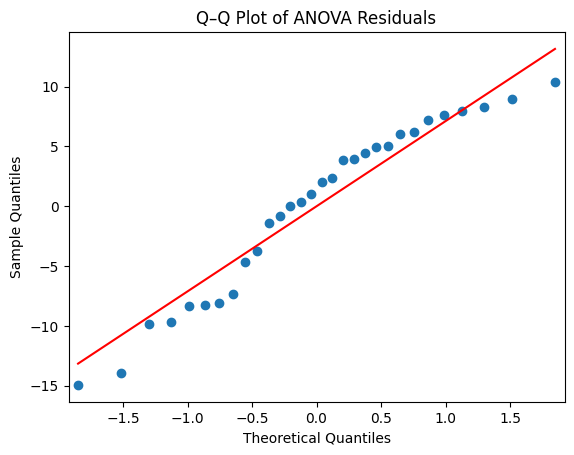

In [20]:
#Visual normality check: Q–Q plot (residuals)
sm.qqplot(model.resid, line="s")
plt.title("Q–Q Plot of ANOVA Residuals")
plt.show()

In [21]:
from scipy import stats

#Get residuals from your regression model
residuals = model.resid

#Perform Shapiro-Wilk Test of Normality
sw_test = stats.shapiro(residuals)

#Extract test statistic and p-value
sw_stat = sw_test.statistic
sw_pvalue = sw_test.pvalue

#Print results
print(f"Shapiro-Wilk Test Statistic: {sw_stat:.4f}")
print(f"Shapiro-Wilk Test P-Value: {sw_pvalue:.4f}")

#Interpret
if sw_pvalue > 0.05:
    print("Fail to reject null hypothesis: Residuals are normally distributed.")
else:
    print("Reject null hypothesis: Residuals are not normally distributed.")


Shapiro-Wilk Test Statistic: 0.9341
Shapiro-Wilk Test P-Value: 0.0630
Fail to reject null hypothesis: Residuals are normally distributed.



The normality assumption of ANOVA was assessed using the residuals:
Visual method: A Q-Q plot of the residuals showed points approximately along the straight line, indicating no major departures from normality.
Testing method: The Shapiro-Wilk test yielded a statistic of 0.934 and a p-value of 0.063 which is greater than 0.05 therfore, we fail to reject the null hypothesis that the residuals are normally distributed.
Overall, both the visual and testing methods support the assumption of normality. Therefore, the ANOVA residuals can be considered approximately normal, and the normality assumption for the ANOVA is satisfied.


**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?



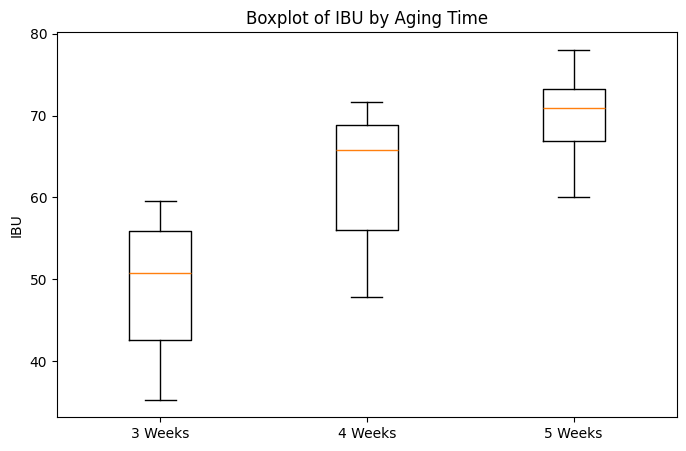

Levene's test statistic: 1.1732962841230243
Levene's test p-value: 0.3246251035079229
Fail to reject null hypothesis: Variances are equal across groups (homogeneity holds).


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import levene
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan

#Load your data
IPA = pd.read_excel("IPA.xlsx")

# Visual method: Boxplot of IBU by Weeks
plt.figure(figsize=(8,5))
plt.boxplot([IPA[IPA['Weeks'] == '3 Weeks']['IBU'],
             IPA[IPA['Weeks'] == '4 Weeks']['IBU'],
             IPA[IPA['Weeks'] == '5 Weeks']['IBU']],
            tick_labels=['3 Weeks','4 Weeks','5 Weeks'])
plt.title('Boxplot of IBU by Aging Time')
plt.ylabel('IBU')
plt.show()

#Levene's test on small sample (simulate n=10 per group to show potential NaN)
group_3 = IPA[IPA['Weeks'] == '3 Weeks']['IBU'].iloc[:10]
group_4 = IPA[IPA['Weeks'] == '4 Weeks']['IBU'].iloc[:10]
group_5 = IPA[IPA['Weeks'] == '5 Weeks']['IBU'].iloc[:10]

levene_stat, levene_p = levene(group_3, group_4, group_5)
print(f"Levene's test statistic: {levene_stat}")
print(f"Levene's test p-value: {levene_p}")

if pd.isna(levene_stat) or pd.isna(levene_p):
    print("Levene's test returned NaN due to small sample size. Test is unreliable.")
elif levene_p > 0.05:
    print("Fail to reject null hypothesis: Variances are equal across groups (homogeneity holds).")
else:
    print("Reject null hypothesis: Variances differ across groups (homogeneity violated).")




Visual method: The boxplot of IBUs by aging time shows that the spreads of the three groups are roughly similar. While the 4 and 5 week groups have slightly larger ranges than the 3 week group, there are no extreme differences in variability or major outliers.

Levene's test returned a statistic of 1.173 and a p-value of 0.325. Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This indicates that the variances of IBU across the 3, 4, and 5 week aging groups are similar. Therefore, the assumption of homogeneity of variance is supported, satisfying one of the key assumptions for ANOVA.


**Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?



In [37]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load data
IPA = pd.read_excel("IPA.xlsx")

# Convert Weeks column to numeric if needed
IPA['Weeks_num'] = IPA['Weeks'].str.replace(" Weeks","").astype(int)

# Fit one-way ANOVA
model = ols('IBU ~ C(Weeks_num)', data=IPA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
F_stat = anova_table['F'].iloc[0]
p_value = anova_table['PR(>F)'].iloc[0]

print(f"F-statistic: {F_stat:.3f}")
print(f"p-value: {p_value:.3f}")


                  sum_sq    df          F    PR(>F)
C(Weeks_num)  2174.83994   2.0  19.339842  0.000006
Residual      1518.12718  27.0        NaN       NaN
F-statistic: 19.340
p-value: 0.000



The one-way ANOVA produced an F-statistic of 19.34 with a p-value of 0.000006. Since the p-value is much less than 0.05, we reject the null hypothesis. This indicates that the mean IBU differs significantly across the 3, 4, and 5 week aging groups, so the alternative hypothesis is more strongly supported: aging time significantly affects the bitterness of the IPA.



**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.



 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
3 Weeks 4 Weeks   13.535 0.0011  5.2205 21.8495   True
3 Weeks 5 Weeks   20.509    0.0 12.1945 28.8235   True
4 Weeks 5 Weeks    6.974 0.1131 -1.3405 15.2885  False
------------------------------------------------------


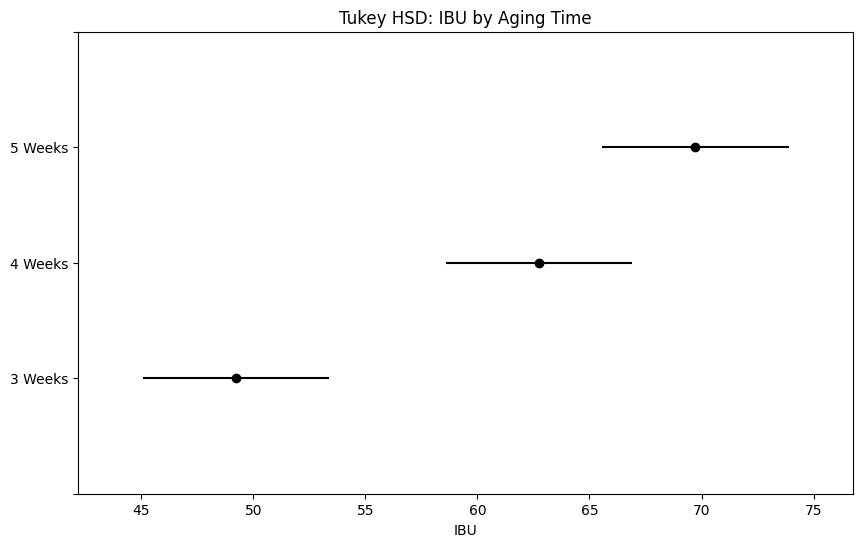

In [35]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

#Load your data
IPA = pd.read_excel("IPA.xlsx")

# Ensure Weeks column is a string
IPA['Weeks'] = IPA['Weeks'].astype(str)

#Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(
    endog=IPA['IBU'],      # Dependent variable
    groups=IPA['Weeks'],   # Grouping variable
    alpha=0.05
)

#Print Tukey table
print(tukey_result)

#Optional: visualize confidence intervals
tukey_result.plot_simultaneous()
plt.title("Tukey HSD: IBU by Aging Time")
plt.xlabel("IBU")
plt.show()



The 3-week aging group is significantly different from both the 4- and 5-week groups, indicating that most of the increase in bitterness (IBU) occurs after 3 weeks. There is no significant difference between the 4- and 5-week groups, suggesting that additional aging beyond 4 weeks does not substantially change IBU.

A post-hoc test would not be appropriate if the ANOVA had failed to reject the null hypothesis, because without a significant overall effect, there is no statistical evidence that any pair of means differs, and performing multiple comparisons could increase the risk of Type I error.


**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses. Additionally, describe any limitations of the experiment and/or your analyses, and suggest potential improvements for future experiments of this nature.

The experiment shows that aging time significantly affects the bitterness (IBU) of the IPA. Exploratory analyses revealed an upward trend in mean IBUs, with 3-week beer being the least bitter and 5-week beer the most bitter. ANOVA confirmed a significant effect of aging time (F = 19.34, p < 0.001), and Tukey's HSD post-hoc test indicated that the 3-week group differs significantly from both the 4- and 5-week groups, while the 4- and 5-week groups are not significantly different. This suggests that the largest increase in bitterness occurs between 3 and 4 weeks, with minimal change beyond 4 weeks.

Assumptions of ANOVA were met: residuals were approximately normal (Shapiro-Wilk p = 0.063), and variances were similar across groups (Levene's test p = 0.325).

Limitations: The study used a single IPA batch and moderate sample sizes (~10-11 bottles per group), which may limit the generalizability of results and the precision of statistical tests. Environmental factors such as oxygen exposure, contamination, or temperature fluctuations could have influenced IBU measurements. While ANOVA assumptions were met, small sample sizes may reduce the ability to detect subtle differences between groups.

Future experiments could increase sample size, test multiple batches, include additional aging times, and better control environmental conditions or it will consider enviromental conditions to improve reliability and generalizability.